<h2>Nagel-Schreckenberg Model</h2>

In the Nagel–Schreckenberg model, a road is divided into cells. In the original model, these cells are aligned in a single row whose ends are connected so that all cells make up a circle (this is an example of what are called periodic boundary conditions). Each cell is either empty road or contains a single car; i.e., no more than one car can occupy a cell at any time. Each car is assigned a velocity which is an integer between 0 and a maximum velocity (= 5 in Nagel and Schreckenberg's original work).


A plot of the average velocity, <v>, as a function of the density of cars per cell, rho, in the Nagel–Schreckenberg model. The black curve is for p = 0, i.e., for the deterministic limit, while the red curve is for p = 0.3.
Time is discretized into time steps. This discretization in both space and time results in a cellular automaton. One can think of a cell as being a few car lengths long and the maximum velocity as being the speed limit on the road. The time step is then the time taken for a car at the speed limit to travel around 10 car lengths. However, the model can also be thought as just a way to understand or to model features of traffic jams by showing how interactions between nearby cars cause the cars to slow down. In each time step, the procedure is as follows:

In each step, the following four actions are conducted in order from first to last, and all are applied to all cars. In each action the updates are applied to all cars in parallel.

- Acceleration: All cars not at the maximum velocity have their velocity increased by one unit. For example, if the velocity is 4 it is increased to 5.

- Slowing down: All cars are checked to see if the distance between it and the car in front (in units of cells) is smaller than its current velocity (which has units of cells per time step). If the distance is smaller than the velocity, the velocity is reduced to the number of empty cells in front of the car – to avoid a collision. For example, if the velocity of a car is now 5, but there are only 3 free cells in front of it, with the fourth cell occupied by another car, the car velocity is reduced to 3.

- Randomization: The speed of all cars that have a velocity of at least 1, is now reduced by one unit with a probability of p. For example, if p = 0.5, then if the velocity is 4, it is reduced to 3 50% of the time.

- Car motion: Finally, all cars are moved forward the number of cells equal to their velocity. For example, if the velocity is 3, the car is moved forward 3 cells.

These four actions are repeated many times, as long as is required to study any traffic jams that may form. The model is an example of a cellular automaton. The model is for a single lane where cars cannot pass each other; there is no overtaking.

In [211]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
sns.set()

np.random.seed(1)

#Traffic Simulation Class

class TrafficSimulation:
    
    def __init__(self, roadLength = 100, trafficDensity = 0.03, maxVelocity = 5, slowDownProbability = 0.5, demo = False):
        
        self.demo = demo
        self.roadLength = roadLength
        self.trafficDensity = trafficDensity
        self.maxVelocity = maxVelocity
        self.slowDownProbability = slowDownProbability
        
        self.state = np.full(roadLength, -1)
        
        random_locations = np.random.choice(roadLength, int(trafficDensity*roadLength), replace=False)
        for i in random_locations:
            self.state[i] = 5

    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))

    
    def update(self):
        
        for slot in range(self.roadLength):
            #check if the slot is a car:
            if self.state[slot] != -1:
                
                #Acceleration: check if car is at max velocity. If not, increase by 1 velocity unit.
                #Slowing down: check if distance in front is smaller than car's current velocity.
                #if distance < car's current velocity, car's current velocity = number of slots
                distance = 1

                while self.state[(slot+distance)%self.roadLength] == -1:
                    distance += 1
                    
                if distance - 1 > self.state[slot]:
                    self.state[slot] = min(self.state[slot] + 1, self.maxVelocity)

                if distance - 1 < self.state[slot]:
                    self.state[slot] = distance - 1

                #Randomization: The speed of all cars that have a velocity >= 1, is now reduced by 1 unit with probability p. 
                #For example, if p = 0.5, then if the velocity is 4, it is reduced to 3 50% of the time.
                if self.state[slot] >= 1:
                    if np.random.random() < self.slowDownProbability:
                        self.state[slot] -= 1
                        

        if self.demo: self.display()
        
        #Car motion: all cars are moved forward the number of cells equal to their velocity. 
        #For example, if the velocity is 3, the car is moved forward 3 cells.
        new_vec = np.full(self.roadLength, -1)
        #set flow counter to 0
        flow = 0
        
        for index,val in enumerate(self.state):
            if val >= 0: new_vec[(index+val)%self.roadLength] = val
            if index+val > self.roadLength: flow += 1
        
        self.state = new_vec
        return flow



In [212]:
densities = np.arange(0,1,0.02)
avg_flows = []
for d in densities:
    #initialize TrafficSimulation object
    sim = TrafficSimulation(trafficDensity = d)

    n = 1000
    flow_counter = 0
    
    for i in range(n):
        flow = sim.update()
        flow_counter += flow
        
    avg_flow = flow_counter/n
    avg_flows.append(avg_flow)

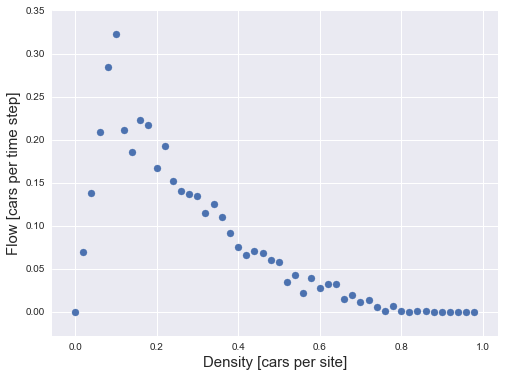

In [213]:
plt.figure(figsize=(8,6))
plt.xlabel("Density [cars per site]",size=15)
plt.ylabel("Flow [cars per time step]",size=15)
plt.scatter(densities,avg_flows)

In [280]:
#Traffic Simulation Class

np.random.seed(100)

class TrafficSimMiddle(TrafficSimulation):
    
    
    def update(self):
        
        for slot in range(self.roadLength):
            #check if the slot is a car:
            if self.state[slot] != -1:
                
                #Acceleration: check if car is at max velocity. If not, increase by 1 velocity unit.
                #Slowing down: check if distance in front is smaller than car's current velocity.
                #if distance < car's current velocity, car's current velocity = number of slots
                front_distance = 1
                back_distance = 1

                while self.state[(slot+front_distance)%self.roadLength] == -1:
                    front_distance += 1
                    
                while self.state[(slot-back_distance)%self.roadLength] == -1:
                    back_distance += 1
                    
                if front_distance + 1 > back_distance:
                    self.state[slot] = min(self.state[slot] + 1, self.maxVelocity, front_distance - 1)
                
                else:
                    self.state[slot] = min(max(self.state[slot] - 1, 0), front_distance - 1)
                    
                #Randomization: The speed of all cars that have a velocity >= 1, is now reduced by 1 unit with probability p. 
                #For example, if p = 0.5, then if the velocity is 4, it is reduced to 3 50% of the time.
                if self.state[slot] >= 1:
                    if np.random.random() < self.slowDownProbability:
                        self.state[slot] -= 1
                        
            
        if self.demo: self.display()
        
        #Car motion: all cars are moved forward the number of cells equal to their velocity. 
        #For example, if the velocity is 3, the car is moved forward 3 cells.
        new_vec = np.full(self.roadLength, -1)
        #set flow counter to 0
        flow = 0
        
        for index,val in enumerate(self.state):
            if val >= 0: new_vec[(index+val)%self.roadLength] = val
            if index+val > self.roadLength: flow += 1
        
        self.state = new_vec
        return flow
                        

middle_sim = TrafficSimMiddle(trafficDensity = 0.1, demo=True)

for i in range(100):
    middle_sim.update()


.....................3...05......1.003...5....................3..............5......................
........................00.....2..000...4.....4..................2................4.................
........................01.......0000.......2.....5................2..................4.............
........................0.2......0000.........0........5.............2....................4.........
........................0...3....0000.........0.............3..........3......................4.....
........................0......0.0001.........0................2..........3.......................5.
...3....................0......0.001.1........1..................1...........3......................
......2.................0......0.00.0.1........1..................0.............4...................
........0...............0......0.01.1..1........2.................1.................5...............
........0...............0......0.0.1.2..2.........3................1.....................4.